# Write functions to read fasta/fastq files and determine the following information: 

### Part 1 - Finding Motifs: 
1. Find motifs within sequences - find their position and the number of times they occur 
2. Find motifs within the reverse complement of the sequence
3. Find the motif's reverse complement within the original sequence
4. Find motoifs in a sequence allowing for a given number of mismatches 

### Part 2 - Analyzing Read Quality: 
5. Find out if there are any positions along the read with lower quality on average than other positions. This would indicate an error with the sequencer. 

## Part 1 - Finding Motifs 

Data downloaded from: 
https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/lambda_virus.fa

In [38]:
filename = 'lambda_virus.fa'

In [39]:
def readFasta(filename):
    genome = ''
    with open(filename, 'r') as f:
        for line in f:
            # ignore header line with genome information
            if not line[0] == '>':
                genome += line.rstrip()
    return genome

In [40]:
genome = readFasta(filename)

### 1. Find motifs within sequences - find their position and the number of times they occur

### 2. Find motifs within the reverse complement of the sequence

### 3. Find the motif's reverse complement within the original sequence

In [60]:
def reverseComplement(s):
    # make sure to add N, N appears from sequencing reads. 
    complement = {'A': 'T', 'C': 'G', 'G': 'C', 'T': 'A', 'N': 'N'}
    t = ''
    for base in s:
        t = complement[base] + t
    return t

In [130]:
# simple strings for testing functions 
p = 'CTA'  # revComp will be TAG
template = 'AAACTACCGATCTAGACTGAACCCAAACAGATAGGGG'

In [131]:
# this function includes extra print statements for troubleshooting
def find_matches_printStatements(pattern, reference):
    occurrences = []
    revComp = reverseComplement(pattern)
    print("pattern: " + str(pattern))
    print("revComp pattern : " + str(revComp))
    for i in range(len(reference) - len(pattern) + 1):   
        print("Reference alignment window: " + str(reference[i:i+len(pattern)]))
        match = True
        for j in range(len(pattern)):  
            print("Base being compared: " + str(reference[i+j]))
            if (reference[i+j] != pattern[j]) and (reference[i+j] != revComp[j]):   
                match = False
                break
        if match:
          occurrences.append(i)
          print("match! " + str(reference[i:i+j+1]))
    return occurrences

In [127]:
find_matches_printStatements(p, template)

pattern: CTA
revComp pattern : TAG
Reference alignment window: AAA
Base being compared: A
Reference alignment window: AAC
Base being compared: A
Reference alignment window: ACT
Base being compared: A
Reference alignment window: CTA
Base being compared: C
Base being compared: T
Base being compared: A
match! CTA
Reference alignment window: TAC
Base being compared: T
Base being compared: A
Base being compared: C
Reference alignment window: ACC
Base being compared: A
Reference alignment window: CCG
Base being compared: C
Base being compared: C
Reference alignment window: CGA
Base being compared: C
Base being compared: G
Reference alignment window: GAT
Base being compared: G
Reference alignment window: ATC
Base being compared: A
Reference alignment window: TCT
Base being compared: T
Base being compared: C
Reference alignment window: CTA
Base being compared: C
Base being compared: T
Base being compared: A
match! CTA
Reference alignment window: TAA
Base being compared: T
Base being compared: 

[3, 11, 12, 15, 22, 26]

In [166]:
# counts the number of times a motif/pattern appears in a sequence
def find_matches(pattern, reference):
    occurrences = []
    revComp = reverseComplement(pattern)
    print("Pattern: " + str(pattern))
    print("Reverse Complement: " + str(revComp))
    #print("Reference genome: " + str(reference))
    len_range = len(reference) - len(pattern) + 1
    for i in range(len_range):   
        match = False
        if reference[i:i+len(pattern)] == pattern:    
            match = True
        elif reference[i:i+len(pattern)] == revComp:
            match = True
        if match: 
            occurrences.append(i)
            #print(reference[i:i+len(pattern)])
    print("Number of matches: " + str(len(occurrences)))
    return occurrences

In [158]:
find_matches(p, template)

Pattern: CTA
Reverse Complement: TAG
Reference genome: AAACTACCGATCTAGACTGAACCCAAACAGATAGGGG
CTA
CTA
TAG
TAG
Number of matches: 4


[3, 11, 12, 31]

### Testing out how 'find_matches' function handles patterns where the reverse complement is the same. 

It works out as supposed to! If they're the same, they're not double counted. Perfect. :) 

In [159]:
q = 'TTAA'   #RC: 'TTAA'
r = 'TAA'    #RC: 'TTA'
template2 = 'ATTAACCCAATTAACCCAATAGGG'

In [160]:
find_matches(q, template2)

Pattern: TTAA
Reverse Complement: TTAA
Reference genome: ATTAACCCAATTAACCCAATAGGG
TTAA
TTAA
Number of matches: 2


[1, 10]

In [161]:
find_matches(r, template2)

Pattern: TAA
Reverse Complement: TTA
Reference genome: ATTAACCCAATTAACCCAATAGGG
TTA
TAA
TTA
TAA
Number of matches: 4


[1, 2, 10, 11]

#### Apply function to downloaded data, not simple test data

In [167]:
find_matches('AGGT', genome)

Pattern: AGGT
Reverse Complement: ACCT
Number of matches: 306


[8,
 122,
 302,
 383,
 555,
 729,
 921,
 1367,
 1663,
 1676,
 1712,
 1772,
 1893,
 2051,
 2244,
 2403,
 2678,
 2688,
 2756,
 2817,
 3163,
 3254,
 3300,
 3829,
 3853,
 4115,
 4254,
 4312,
 4646,
 4917,
 5069,
 5162,
 5192,
 5685,
 5761,
 5869,
 6315,
 6341,
 6507,
 6585,
 6834,
 6983,
 7397,
 7506,
 7627,
 7715,
 7822,
 7987,
 8010,
 8103,
 8121,
 8296,
 8719,
 8762,
 8932,
 8986,
 9084,
 9464,
 9621,
 9980,
 10419,
 10836,
 10916,
 11196,
 11205,
 11426,
 11919,
 12183,
 12392,
 12489,
 12512,
 12994,
 13090,
 13105,
 13163,
 13217,
 13346,
 13351,
 13415,
 13507,
 13516,
 13562,
 13575,
 13675,
 13747,
 13816,
 13941,
 13947,
 13953,
 14384,
 14621,
 14758,
 14863,
 14953,
 15068,
 15291,
 15421,
 15553,
 15611,
 15846,
 15876,
 15981,
 16015,
 16165,
 16195,
 16234,
 16473,
 16486,
 16611,
 16702,
 17104,
 17131,
 17371,
 17410,
 17437,
 17776,
 17939,
 17944,
 18554,
 18736,
 18856,
 18914,
 18955,
 19035,
 19313,
 19450,
 19470,
 19591,
 19836,
 19950,
 19983,
 20067,
 20492,
 2080

AGGT alone is 150 matches
ACCT is 156 
together they are: 306 ... hmmm, something is weird with my function. Fixed! See above. 


In [168]:
find_matches('TTAA', genome)

Pattern: TTAA
Reverse Complement: TTAA
Number of matches: 195


[46,
 77,
 90,
 732,
 1455,
 2175,
 3274,
 3418,
 4348,
 4463,
 5267,
 5708,
 6075,
 6183,
 6540,
 7026,
 7948,
 8061,
 8199,
 8460,
 9078,
 9252,
 9691,
 9951,
 11082,
 11115,
 11517,
 11583,
 12618,
 12966,
 14107,
 14991,
 15627,
 15967,
 16033,
 16294,
 16858,
 18868,
 19136,
 19481,
 20799,
 21440,
 21634,
 21701,
 21902,
 21947,
 22723,
 23047,
 23083,
 23110,
 23205,
 23278,
 23284,
 23478,
 23497,
 23554,
 23692,
 23886,
 23978,
 23986,
 24072,
 24101,
 24750,
 24986,
 25169,
 25254,
 25352,
 25436,
 25577,
 25745,
 25967,
 26132,
 26425,
 26450,
 26482,
 26522,
 26584,
 26650,
 26665,
 26678,
 26692,
 26762,
 26809,
 26983,
 26992,
 27037,
 27091,
 27202,
 27316,
 27682,
 28455,
 28568,
 28921,
 28971,
 29373,
 29980,
 30381,
 30619,
 30638,
 30721,
 30734,
 30755,
 31168,
 31807,
 32193,
 32217,
 32640,
 32703,
 33221,
 33350,
 33687,
 33735,
 33747,
 33800,
 34201,
 34365,
 34405,
 34589,
 34617,
 34686,
 34734,
 34752,
 34830,
 35061,
 35259,
 35533,
 35540,
 36274,
 36281,

In [169]:
find_matches('ACTAAGT', genome)

Pattern: ACTAAGT
Reverse Complement: ACTTAGT
Number of matches: 3


[26028, 27733, 45382]

In [170]:
find_matches('AGTCGA', genome)

Pattern: AGTCGA
Reverse Complement: TCGACT
Number of matches: 9


[450, 1908, 2472, 18005, 23320, 33657, 41927, 44806, 45369]

## 4. Find motoifs in a sequence allowing for a given number of mismatches 

In [205]:
# Note - don't include reverse complement here 

def naive_2mm_printStatements(pattern, reference):
    occurrences = []
    print("pattern: " + str(pattern))
    for i in range(len(reference) - len(pattern) + 1):   
        print("Reference alignment window: " + str(reference[i:i+len(pattern)]))
        match = True
        mismatches = 0
        for j in range(len(pattern)):  
            print("Base being compared: " + str(reference[i+j]))
            if reference[i+j] != pattern[j]:   
                mismatches += 1
                print("mismatches: " + str(mismatches))
                if mismatches > 2: 
                    print("break")
                    match = False
                    break
        if match:
            occurrences.append(i)
        print("match! " + str(reference[i:i+j+1]))
    print(" ")
    print("Match sequences:")
    for o in occurrences: 
        print(reference[o:o+len(pattern)])
    print("Number of matches: " + str(len(occurrences)))
    return occurrences

In [206]:
naive_2mm_printStatements(r, template2)

pattern: TAA
Reference alignment window: ATT
Base being compared: A
mismatches: 1
Base being compared: T
mismatches: 2
Base being compared: T
mismatches: 3
break
match! ATT
Reference alignment window: TTA
Base being compared: T
Base being compared: T
mismatches: 1
Base being compared: A
match! TTA
Reference alignment window: TAA
Base being compared: T
Base being compared: A
Base being compared: A
match! TAA
Reference alignment window: AAC
Base being compared: A
mismatches: 1
Base being compared: A
Base being compared: C
mismatches: 2
match! AAC
Reference alignment window: ACC
Base being compared: A
mismatches: 1
Base being compared: C
mismatches: 2
Base being compared: C
mismatches: 3
break
match! ACC
Reference alignment window: CCC
Base being compared: C
mismatches: 1
Base being compared: C
mismatches: 2
Base being compared: C
mismatches: 3
break
match! CCC
Reference alignment window: CCA
Base being compared: C
mismatches: 1
Base being compared: C
mismatches: 2
Base being compared: A


[1, 2, 3, 6, 7, 8, 10, 11, 12, 15, 16, 17, 18, 19]

In [207]:
def naive_2mm(pattern, reference):
    occurrences = []
    for i in range(len(reference) - len(pattern) + 1):   
        match = True
        mismatches = 0
        for j in range(len(pattern)):  
            if reference[i+j] != pattern[j]:   
                mismatches += 1
                if mismatches > 2: 
                    match = False
                    break
        if match:
            occurrences.append(i)
    print("Number of matches: " + str(len(occurrences)))
    return occurrences

In [209]:
naive_2mm('TTCAAGCC', genome)

Number of matches: 191


[45,
 418,
 656,
 776,
 975,
 1311,
 1346,
 3166,
 3265,
 3292,
 3544,
 4237,
 4378,
 4481,
 4518,
 5240,
 5369,
 5597,
 5773,
 5871,
 5971,
 6350,
 6365,
 6564,
 6572,
 6684,
 6731,
 6764,
 6765,
 6929,
 7026,
 7487,
 7783,
 7790,
 8222,
 8251,
 8284,
 8749,
 9078,
 9197,
 9506,
 9942,
 10734,
 10969,
 11211,
 11331,
 11453,
 11640,
 11973,
 12711,
 13670,
 13750,
 13884,
 14687,
 14884,
 15745,
 16293,
 16817,
 17107,
 17349,
 17541,
 17779,
 17838,
 18792,
 19067,
 19719,
 19779,
 21614,
 21854,
 22174,
 22462,
 22722,
 22956,
 23126,
 23522,
 23677,
 23683,
 23820,
 23885,
 24369,
 24584,
 24787,
 25116,
 25554,
 26046,
 26665,
 26887,
 27237,
 27258,
 28166,
 28276,
 28531,
 28639,
 28920,
 28963,
 29021,
 29144,
 29733,
 29921,
 30176,
 30278,
 30362,
 30395,
 30536,
 30721,
 30967,
 31049,
 31379,
 31449,
 31474,
 31482,
 31641,
 31732,
 31749,
 31829,
 31867,
 31872,
 32523,
 32640,
 32754,
 32779,
 32857,
 32977,
 33079,
 33107,
 33371,
 33403,
 33653,
 33686,
 33863,
 34061,


In [210]:
naive_2mm('AGGAGGTT', genome)

Number of matches: 215


[49,
 282,
 299,
 302,
 380,
 1560,
 1650,
 2235,
 2277,
 2400,
 2562,
 2565,
 2729,
 2823,
 3160,
 3181,
 3946,
 4210,
 4294,
 4309,
 4405,
 4580,
 5069,
 5159,
 5189,
 5231,
 5331,
 5519,
 5737,
 5882,
 5993,
 5996,
 6011,
 6312,
 6522,
 6585,
 6606,
 7316,
 7394,
 7819,
 7904,
 7966,
 7998,
 8534,
 8648,
 8946,
 9339,
 9354,
 9530,
 9842,
 9966,
 10041,
 10250,
 10416,
 10445,
 10484,
 10527,
 10874,
 11193,
 11292,
 11505,
 11568,
 11655,
 11745,
 11838,
 12078,
 12180,
 12222,
 12697,
 12745,
 12819,
 12880,
 12935,
 13011,
 13087,
 13256,
 13415,
 13526,
 13813,
 14259,
 15385,
 15473,
 16192,
 17101,
 17437,
 17755,
 17936,
 17989,
 18016,
 18040,
 18727,
 18853,
 18911,
 19232,
 19263,
 19310,
 19833,
 19929,
 19932,
 19947,
 19980,
 20793,
 20802,
 21305,
 21528,
 21627,
 21684,
 22414,
 22660,
 22670,
 22787,
 23326,
 24063,
 24145,
 24409,
 24595,
 24681,
 25120,
 25139,
 25210,
 25381,
 25384,
 25648,
 25664,
 25773,
 25987,
 26196,
 26208,
 26576,
 26587,
 26653,
 26736,
 

## Part 2 - Analyzing Read Data 

Data downloaded from: 
https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR037900_1.first1000.fastq

* FASTQ format
* file contains many reads in it - examine all of them 

### 5. Find out if there are any positions along the read with lower quality on average than other positions. 

Note, this is the position of the read from the sequencer, not the position of the base once it has been aligned to the reference genome. If there is a position of a read that is consistently low, it would indicate an error with the sequencer.





In [ ]:
def readFastq(filename):
    sequences = []
    qualities = []
    with open(filename) as fh:
        while True:
            fh.readline() # skip name line
            seq = fh.readline().rstrip() # read base sequence
            print(seq)
            fh.readline() # skip placeholder line
            qual = fh.readline().rstrip() #base quality line
            print(qual)
            if len(seq) == 0:
                break
            sequences.append(seq)
            qualities.append(qual)
    return sequences, qualities

In [7]:
seqs, quals = readFastq('ERR037900_1.first1000.fastq')

TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCNAACCCTAACCCTAACCCTAACCCTAACCCTAAC
HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHGFHHHFHFFHHHHHGHHFHEH@4#55554455HGFBF<@C>7EEF@FBEDDD<=C<E
TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCNAACCCTAACCCTAACCCTAACCCTNACCCTAAC
HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHCHHHHEHHBA#C>@54455C/7=CGHEGEB;C############
TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCNAACCCTAACCCTAACCCTAACCCTAACCCTAAC
HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHGHHHHHHHHHHHHHDHHHDEHHHHFGIHEHEGGGF4#45655366GIGEHAGBG################
TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCNAACCCTAACCCTAACCCTAACCCTAACCCTACC
HHHHHHHHHHHHHHHHHHHHHHHHHIHHHHHHHHHHHHHHHHHHHHHHIHHHHHIHFHHHIHHHHD#ECA54655GGIBH?BD@+BCBF?5A=::>8?##
AACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTNACCCTAACCCTAACCCTAACCCTAAACCTAACC
HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHIHIHEHHIGHIFFHIIGF6#555:2=7=CB;?3CAACBAC2B##

EGGGGGGBGGGGDG;24444A;A>ADC4@9DDC4@>CCC2444448@6DF##################################################
CCCTAACCCTAACCCTAACCCTAACCCCTAACCCCTAACCCTAACCCTAACCCTAACCCTAACCCTNACCCTAACCCTACACCTAACCCTAACCCTAACC
HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHFHHAHHHFHGHGHGIEHIFIGFHEFFIGIIH6#===>>=?AEEBC5%60354513+BAB#######
GGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGTTAGGGTTAGGGTTAGGGTTAGGNGTAGGGGTTGGGGTAGGGTTGGGGTTAGGGGGT
HHHHHHHHHHHHHHGHHHHHIHFHHHGHHHHHGHGHHHDHDGF=F?CCA5=<=>>4E<EC########################################
GGGGTTGGGGTTGGGGTTGGGGTTGGGGTAGGGTTAGGGTGAGGGTGAGGGTGAGGGGGAGGGTGAGGGGGGGGGTTAAGGGTGAGGGTTGGGGTTAGGG
HHHHIHHHHHHHHHHHGHHHHHIHHHHH?DHHHEHGHHH=@6DA@2F6FA##################################################
CCTAACCCTAACCCTAACCCTAACCCCAAACCCCTAACCATAACCCTAACCCTAACCCTAACCCTANCCCTACCCCTAACCCTAACCCTAACCCTACCCC
HHDHHHHHHHGHHHGHHHHGHHHHHD8?DDDD@###################################################################
TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCNAACCCTAACCCTAACCCTAACCCC

AGCAGCTGGTGATGTGTGGGCCCACCGGCCCCAGGCTCCTGTCTCCCCCCAGGTGTGTGGTGATGCNAGGCATGCCCTTCCCCAGCATCCGGTCTCCAGA
GGGGGGGGG@GGCGEGGGGGEGGGGGGEGGGGEGE=@@D9FFFFFGEGBBBFEGG@FAGGGGEAG5#/33553/6FG0GGGCEG<E@BE###########
TCCAGCAGCTGGACCCCTACCTGCCGTCTGCTGCCATCGGAGCCCAAAGCCGCGCTGTGACTGCTCNGACCAGCCGGCTGGAGGGGGGGGCGCAGGAGGG
HHHHGHHHHHHHHHHHHHHHHHHGHHHHHHHHHHHHHHHHHHFCHFFHFF5564445645HCA@F=#78>54535FF;DDG?CF################
CTCTGGAGACCTGATGCTGGGGAAGGGCATGCCTGGCATCACCACACACCTGNGGGGAGACAGGAGNCTGGGGCCGGTGGGCCCACACATCACCAGCTGC
HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH#HF=A9@;HHIGIF#FBBEACCEGGEEEHGEFEHGG4GGCGDC<A###
TCCAGCAGCTGGACCCCTACCTGCCGTCTGCTGCCATCGGAGCCCAAAGCCGGGCTGTGACTGCTCNGACCAGCCGGCTGGCGGGAGGGGCTCAGCAGGG
HHHHHHHHHHHHHFHHHHHHHHHHHHHGHCHHHHHHHHHF=DCDDHBFEHHEHEH5AADD8>:<52#50355555ADD9D####################
CTGGTGATGTGTGGGCCCACCGGCCCCAGGCTCCTGTCTCCCCCCAGGAGTGTGGTGATGCCAGGCNTGCCCTTCCACAGCATCAGGTATCCAGCGCTGC
CGCCF@CC?=CC7:=3CA?ACC1C>FFFFF:FFFC=7A#####################################################

In [8]:
# Convert quality scores from ASCII to numerical format (phred formula) 
def phred33ToQ(qual):
    return ord(qual) - 33

In [31]:
def scorePerPosition(qualities):
    #iterate through each read 
    scores = [0]*len(qualities[0])
    for read in qualities:
        #print(read)
        for r in range(len(read)):
            phred = read[r]
            q = phred33ToQ(phred)
            scores[r] += q
    #print(scores)
    return scores

In [34]:
scores = scorePerPosition(quals)
print(scores)

[38435, 38460, 38400, 38428, 38417, 38382, 38362, 38364, 38325, 38343, 38194, 38154, 38089, 38152, 38153, 38099, 38055, 38041, 38067, 38150, 38087, 37989, 38009, 37909, 38028, 37576, 37514, 37503, 37578, 37552, 37629, 37555, 37548, 37433, 37402, 37343, 37198, 37126, 37158, 36904, 36742, 36677, 36645, 36493, 36509, 36375, 36205, 35974, 35847, 35673, 34832, 34739, 34399, 34402, 34025, 33025, 32882, 32741, 32573, 32224, 30805, 30666, 30343, 30131, 29463, 17891, 4526, 17881, 17865, 17852, 17466, 17131, 17134, 17098, 16852, 23745, 23958, 23221, 22902, 22366, 20904, 20584, 20383, 19767, 19095, 18061, 17757, 17152, 16972, 16286, 14811, 14679, 14310, 14152, 13734, 12538, 12278, 12179, 11676, 11561]


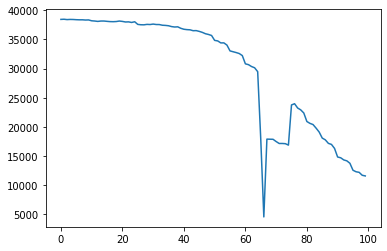

In [35]:
# Plot a histogram of the scores to see which is lower
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(range(len(scores)), scores)
plt.show()

It looks like there is a very low quality score around 65. let's find out what it is exactly. 

In [37]:
import numpy as np 
np.argmin(scores)

66